<h1 style="color:red"> Prodigy InfoTech : Classification Dog vs Cat Using SVM </h1>

<h1> Summary To Explain Project (Keypoints) </h1>

<ul>
    <li>The code uses Support Vector Machines (SVM) to build a model for classifying images of cats and dogs.</li>
    <li>It loads the dataset of cat and dog images and resizes them to a fixed size.</li>
    <li>The images are split into training and validation sets.</li>
    <li>An SVM model with a linear kernel is trained on the training set.</li>
    <li>The model predicts the labels for the validation set, and the accuracy is calculated.</li>
    <li>The trained model is saved to a file for future use.</li>
    <li>Image paths of new images to be predicted are provided.</li>
    <li>The new images are preprocessed by resizing, converting to grayscale, and flattening.</li>
    <li>The saved SVM model is loaded, and the predictions for the new images are made.</li>
    <li>The original images and their predicted labels are displayed.</li>
    <li>This code demonstrates the process of training an SVM model for image classification and using it to make predictions on new images.</li>
</ul>
    

In [1]:
# pip install kaggle
# !pip install opencv-python

In [2]:
# !mkdir -p ~/.kaggle
# # cp kaggle.json ~/.kaggle/

# !kaggle datasets download -d virajtamakuwala/dogs-vs-cats-redux

In [3]:
# import zipfile
# zip_ref = zipfile.ZipFile('dogs-vs-cats-redux.zip')
# zip_ref.extractall('/content')
# zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
from PIL import Image

In [5]:
# Load the dataset
train_dir = "/content/train/train/"
test_dir = "/content/test/test/"
train_images = [train_dir+i for i in os.listdir(train_dir)]
test_images = [test_dir+i for i in os.listdir(test_dir)]

In [6]:
# Define the image size
image_size = 50

In [7]:
# Define a function to read and resize the images
def read_image(file_path):
    img = cv2.imread(file_path,cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, (image_size, image_size), interpolation=cv2.INTER_CUBIC)

In [8]:
# Load the images and labels
def load_data():
    X = []
    y = []
    for image_file in train_images:
        X.append(read_image(image_file))
        if 'dog' in image_file:
            y.append(1)
        else:
            y.append(0)
    return X, y

In [9]:
# Split the dataset into training and validation sets
X, y = load_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Flatten the images
X_train = np.array(X_train).reshape(len(X_train), -1)
X_val = np.array(X_val).reshape(len(X_val), -1)

In [11]:
# Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [12]:
# Predict the labels for the validation set
y_pred = svm.predict(X_val)

In [13]:
# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [14]:
# Save the trained SVM model
filename = 'svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))

In [15]:
# Load the saved SVM model
filename = 'svm_model.sav'
svm = pickle.load(open(filename, 'rb'))

In [16]:
# List of image file paths
image_paths = ['cat.6844.jpg', 'dog.1177.jpg','dog.1179.jpg', 'cat.6849.jpg','12475.jpg','11.jpg']

In [17]:
# Predict labels for each image
predictions = []
for image_path in image_paths:
    # Load the image
    custom_image = Image.open(image_path)

    # Resize the image to the desired size while maintaining the aspect ratio
    custom_image.thumbnail((image_size, image_size))

    # Create a new white background image with the desired size
    new_image = Image.new("RGB", (image_size, image_size), color="white")
    
    # Paste the resized image onto the white background image
    new_image.paste(custom_image, ((image_size - custom_image.width) // 2, (image_size - custom_image.height) // 2))

    # Convert the image to grayscale
    new_image = new_image.convert("L")

    # Flatten the image
    custom_image_flattened = np.array(new_image).reshape(1, -1)

    # Predict the label of the image
    label = svm.predict(custom_image_flattened)
    if label[0] == 0:
        predictions.append("Cat")
    else:
        predictions.append("Dog")

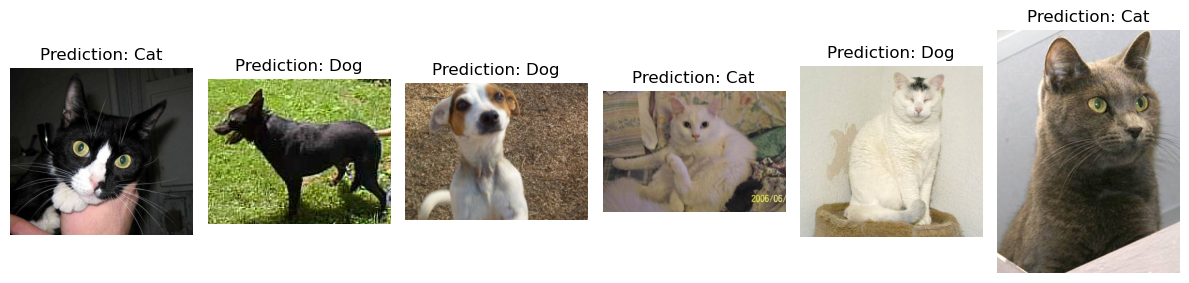

In [18]:
# Display the images and their predicted labels
num_images = len(image_paths)
fig, axs = plt.subplots(1, num_images, figsize=(12, 4))

for i in range(num_images):
    image_path = image_paths[i]
    prediction = predictions[i]

    # Load the original image
    custom_image = Image.open(image_path)

    # Display the original image and its predicted label
    axs[i].imshow(custom_image)
    axs[i].set_title(f"Prediction: {prediction}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()
